In [173]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [2]:
from urllib.request import urlretrieve

In [5]:
url = "https://lh5.googleusercontent.com/yO12GARP3fqmNOZ00zM9Q_nyBVWWfR_xVu8skrvAmhB1hzSJyq_F593jhQqS48aWJyCZ5jzDAQ=w513"
pico = 'count_it.png'
urlretrieve(url, pico)

('count_it.png', <http.client.HTTPMessage at 0x7f5bdb3c3780>)

In [3]:
pico = 'count_it.png'

In [2]:
from sys import argv
from PIL import Image
import numpy as np

In [16]:
from collections import Counter

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

<img src="count_it.png" />

In [4]:
# deep = 2, length = 2 ||| dotsize: 2x2
img = Image.open(pico)
bw_img = img.convert('1')
pix = np.array(bw_img, dtype=int)

In [5]:
b = (pix+1)%2

In [69]:
21 * 16

336

In [6]:
from collections import deque

In [31]:
m = """
    def right(self, dw, idj):
        # to the right border
        r = True
        sright = idj + 1
        try:
            while r:
                point = dw[sright]
                if point != 0 and point == 1:
                    point = self.count
                    self.rlen += 1
                    self.down(dw+1, sright)
                else:
                    r = False
                sright += 1
        except:
            pass

    def left(self, dw, idj):
        # to the left border
        l = True
        sleft = idj - 1
        if (idj-1) != -1:
            while l:
                point = dw[sleft]
                if point != 0 and point == 1:
                    point = self.count
                    self.llen += 1
                    self.down(dw+1, sleft)
                else:
                    l = False
                sleft -= 1
"""

In [138]:
class CountDots:
    """ 5x5 pix
    
    find nah white pixel and change it to float :: 165 -> 0.1
    165 -> blue, 1.0 -> count of founded pixel | float to nah change it
    
    for row in pix:
        for column in row:
            if column.value != 255 and column.value not float:
                change column.value to float
                
                # check down value
                if pix[row+1] != 255 and ...: change it
                and check left, right side
    """
    
    def __init__(self):
        #self.b = (pix+1)%2
        self.och = deque()
        self.photo = Image.open(pico) #your image
        self.photo = self.photo.convert('RGB')
        self.width = self.photo.size[0]
        self.height = self.photo.size[1]
        self.copied = zeros((self.width, self.height))
        #self.llen = 0
        #self.rlen = 0
        self.deep = 1
        self.count = 0.1
        self.length = 0

    def update_len(self):
        #print('llen: ', self.llen)
        #print('rlen: ', self.rlen)
        klen = self.llen + 1 + self.rlen
        print('klen: ', klen)
        qlen = len(self.och)
        print('qlen: ', qlen)
        if klen > self.length:
            if qlen < 3:
                if self.och:
                    if min(self.och) < klen:
                        self.och.append(klen)
                else:
                    self.och.append(klen)
            else:
                har = []
                for _ in range(len(self.och)):
                    m = self.och.pop()
                    if m > klen:
                        har.append(m)
                for i in har:
                    self.och.append(i)
                print('och: ', self.och)
                self.length = max(self.och)
                print('length updated: ', self.length)
        self.llen = 0
        self.rlen = 0

    def right(self, idi, idj):
        # to the right border
        r = True
        km = [idj-1]
        #sright = idj
        try:
            while r:
                point = self.b[idi][idj]
                print('right: ', point)
                if point != 0 and point == 1:
                    self.b[idi][idj] = self.count
                    km.append(idj)
                    #self.rlen += 1
                else:
                    r = False
                idj += 1
        except Exception as e:
            print("EXP:: ", e)
        return km

    def left(self, idi, idj):
        # to the left border
        l = True
        km = [idj+1]
        #sleft = idj
        #if idj != -1 and:
        while l:
            point = self.b[idi][idj]
            #print('dw: ', dw)
            #print('ids: ', self.b[idi])
            #print('idi: ', idi)
            #print('idj: ', idj)
            print('left: ', point)
            if point != 0 and point == 1:
                self.b[idi][idj] = self.count
                km.append(idj)
                #self.llen += 1
            else:
                l = False
            idj -= 1
        return km

    def down(self, idi, idj, flag):
        dw = self.b[idi]

        if dw[idj] != 0 and dw[idj] == 1:
            dw[idj] = self.count

            print('st --::: ')
            km = self.left(idi, idj-1)
            for i in self.right(idi, idj+1):
                if i not in km:
                    km.append(i)
            #km.extend(self.right(idi, idj+1))
            print(':::-- st ')
            # self.update_len()
            print('leng <: ', len(km))
            if flag == "root":
                self.deep = 1
                #print("updated: ", self.deep)
            elif flag == "deep":
                self.deep += 1
                print('deep: ', self.deep)
            
            # limit value to go down: if 5x5 then: self.deep < 6
            if self.deep < 3:
                self.des(idi+1, km)

    def des(self, todow, kgs):
        if kgs:
            print('gqq: ', kgs)
            for i in kgs:
                self.down(todow, i, "deep")

    """
    def run(self):
        #define W and H
        width = self.photo.size[0]
        height = self.photo.size[1]

        for y in range(0, height): #each pixel has coordinates
            for x in range(0, width):
                RGB = photo.getpixel((x,y))
                _,_,B = RGB  #now you can use the RGB value
                if B != 255 and not isinstance(B, float):
                    self. = self.count
                    try:
                        dw = self.b[idi+1][idj]
                        if dw != 0 and dw == 1:
                            #print('deep: ', self.deep)
                            self.down(idi+1, idj, "root")
                            self.count += 1
                            print('count: ', self.count)
                    except IndexError:
                        pass
    """
             
    def start(self):
        for idi, i in enumerate(b[:35]):
            for idj, j in enumerate(i):
                if j != 0 and j == 1:
                    self.b[idi][idj] = self.count
                    try:
                        dw = self.b[idi+1][idj]
                        if dw != 0 and dw == 1:
                            #print('deep: ', self.deep)
                            self.down(idi+1, idj, "root")
                            self.count += 1
                            print('count: ', self.count)
                    except IndexError:
                        pass
        print('total count: ', self.count)

In [139]:
cd = CountDots()
cd.start()

st --::: 
left:  0
right:  0
:::-- st 
leng <:  1
gqq:  [114]
count:  3
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
gqq:  [116, 117]
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
deep:  2
gqq:  [117, 118]
count:  4
st --::: 
left:  0
right:  0
:::-- st 
leng <:  1
gqq:  [196]
count:  5
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
gqq:  [198, 199]
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
deep:  2
gqq:  [199, 200]
count:  6
st --::: 
left:  0
right:  0
:::-- st 
leng <:  1
gqq:  [331]
st --::: 
left:  0
right:  0
:::-- st 
leng <:  1
deep:  2
gqq:  [331]
count:  7
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
gqq:  [333, 334]
st --::: 
left:  0
right:  0
:::-- st 
leng <:  1
deep:  2
gqq:  [333]
st --::: 
left:  1
left:  0
right:  0
:::-- st 
leng <:  2
deep:  3
count:  8
st --::: 
left:  0
right:  0
:::-- st 
leng <:  1
gqq:  [492]
count:  9
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
gqq:  [49

count:  104
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
gqq:  [406, 407]
count:  105
st --::: 
left:  0
right:  0
:::-- st 
leng <:  1
gqq:  [458]
count:  106
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
gqq:  [460, 461]
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
deep:  2
gqq:  [461, 462]
count:  107
st --::: 
left:  0
right:  0
:::-- st 
leng <:  1
gqq:  [33]
count:  108
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
gqq:  [35, 36]
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
deep:  2
gqq:  [36, 37]
count:  109
st --::: 
left:  0
right:  0
:::-- st 
leng <:  1
gqq:  [244]
count:  110
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
gqq:  [246, 247]
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
deep:  2
gqq:  [247, 248]
count:  111
st --::: 
left:  0
right:  0
:::-- st 
leng <:  1
gqq:  [270]
count:  112
st --::: 
left:  0
right:  1
right:  0
:::-- st 
leng <:  2
gqq:  [272, 273]
st --:

In [140]:
import matplotlib.image as mpimg

In [141]:
img = mpimg.imread(pico)

In [152]:
img.argmax()

0

In [1]:
from PIL import Image

In [4]:
photo = Image.open(pico) #your image
photo = photo.convert('RGB')

width = photo.size[0] #define W and H
height = photo.size[1]

X = []
Y = []




for y in range(0, height): #each pixel has coordinates
    for x in range(0, width):

        RGB = photo.getpixel((x,y))
        _,_,B = RGB  #now you can use the RGB value
        if B != 255:
            #print(B)
            X.append(x)
            Y.append(y)

In [165]:
import numpy as np

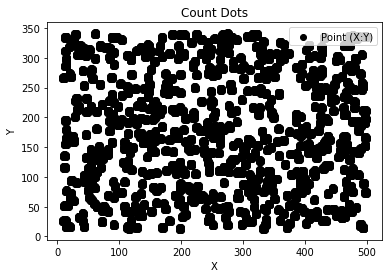

In [169]:
plt.scatter(X, Y, label='Point (X:Y)', color='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Count Dots')
plt.legend()
plt.show()

In [8]:
# nah WHITE Pixels in pic
len(X)

19347

In [9]:
# DOTSIZE = 5x5
len(X)/5

3869.4

In [172]:
XX = np.array(list(zip(X, Y))).reshape(len(X), 2)

In [174]:
k = 3869

In [175]:
from sklearn.cluster import KMeans

In [ ]:
kme = KMeans(n_clusters=k).fit(XX)

In [ ]:
f

In [ ]:
coordinatesCenter = []
def find_center(xl, yl, coor):
    x_cen = np.sum(xl)/len(xl)
    y_cen = np.sum(yl)/len(yl)
    coor.append(x_cen)
    coor.append(y_cen)

    
find_center(X, Y, coordinatesCenter)

np.array(coordinatesCenter)

In [161]:
from numpy import zeros

In [51]:
#print('i[idi]: ', i[idi], 'idj: ', idj)
#b[idi][idj] = count
#down(idi+1, idj)

# print(float(f"{idi}.{idj}"))
# new_arr.append(float(f"{idi}.{idj}"))

In [82]:
# new_arr.clear()
# new_arr

In [32]:
mn = [1, 2, 3]
sm = [4, 5, 6]

In [33]:
mn.extend(sm)

In [41]:
1 + 1 + 0

2

In [25]:
mn = deque([1, 2, 3])

In [27]:
max(mn)

3

In [47]:
from sklearn.cluster import KMeans

In [75]:
b.shape

(353, 513)

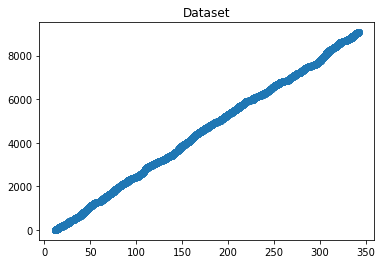

In [81]:
plt.plot()
plt.title('Dataset')
plt.scatter(new_arr, np.arange(len(new_arr)))
plt.show()

In [ ]:
# :KMEANS EXAMPLE:


plt.plot()
#plt.xlim([0, 10])
#plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# KMeans algorithm 
K = 3
kmeans_model = KMeans(n_clusters=K).fit(X)

plt.plot()
for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])

plt.show()